<a href="https://colab.research.google.com/github/ayushjn1995/global_terrorism/blob/main/CH_Ayush_Jain_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from IPython.display import clear_output
%matplotlib inline
pd.set_option("display.max_colwidth", -1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
working_directory = '/content/drive/My Drive/Almabetter/'
df = pd.read_csv(working_directory + 'Global_Terrorism_Data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sub_df = df[['eventid','iyear','country_txt','region_txt','provstate','city','attacktype1_txt','targtype1_txt','nkill','weapdetail','nwound','gname']]
sub_df.rename(columns = {'eventid':'id','iyear':'year','country_txt':'country','provstate':'state','region_txt':'region','attacktype1_txt':'attack_type','targtype1_txt':'target_type','nkill':'total_kills','nwound':'total_wounds','gname':'terrorist_group'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**1. Number of Attacks done in every country in each year** 

---



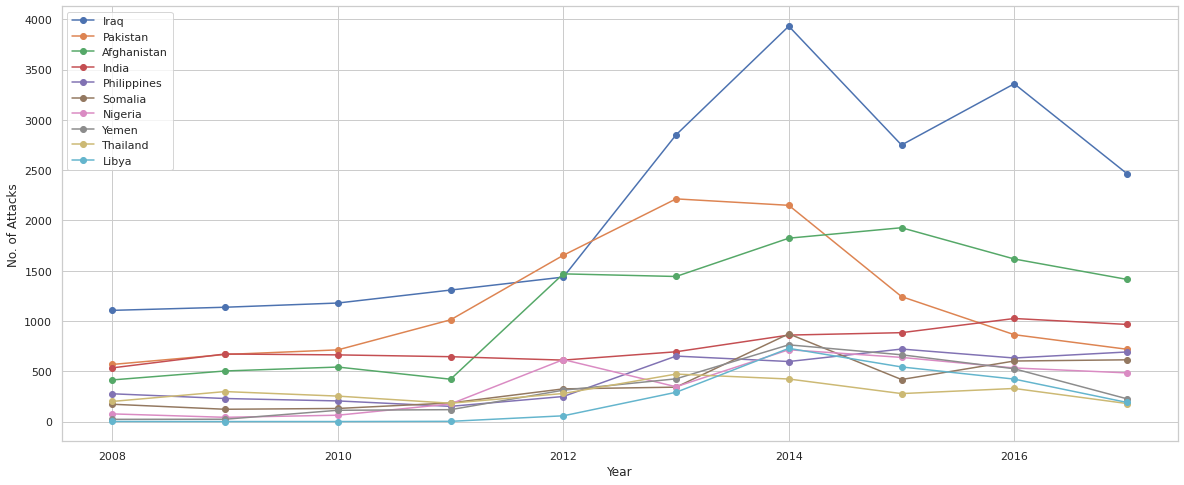

In [ ]:
country_df=sub_df[sub_df['year'] > 2007 ][["country","year"]].copy()
country_wise=country_df.groupby(['country','year']).agg({'country':'count'}).rename(columns={'country':'total_attacks'}).sort_values(['country','year'], ascending=[True,False])
country_wise.reset_index(inplace = True)
total_attacks_country = country_wise.groupby("country").agg({'total_attacks':'sum'}).nlargest(10,"total_attacks")
country_df=sub_df[['country','year']].copy()
country_wise=country_df.groupby(['country','year']).agg({'country':'count'}).rename(columns={'country':'total_attacks'}).sort_values(['country','year'], ascending=[True,False])
Country_final = country_wise.unstack().T
Country_final.fillna(0, inplace = True)
Country_final.reset_index(inplace= True)
Country_final_final = Country_final.loc[Country_final.year > 2007,["year","Iraq","Pakistan",'Afghanistan','India','Philippines','Somalia','Nigeria','Yemen','Thailand','Libya']]
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(Country_final_final.year, Country_final_final.Iraq, marker = 'o', label = "Iraq")
plt.plot(Country_final_final.year, Country_final_final.Pakistan, marker = 'o', label = "Pakistan")
plt.plot(Country_final_final.year, Country_final_final.Afghanistan, marker = 'o', label = "Afghanistan")
plt.plot(Country_final_final.year, Country_final_final.India, marker = 'o', label = "India")
plt.plot(Country_final_final.year, Country_final_final.Philippines, marker = 'o', label = "Philippines")
plt.plot(Country_final_final.year, Country_final_final.Somalia, marker = 'o', label = "Somalia")
plt.plot(Country_final_final.year, Country_final_final.Nigeria, marker = 'o', label = "Nigeria")
plt.plot(Country_final_final.year, Country_final_final["Yemen"], marker = 'o', label = "Yemen")
plt.plot(Country_final_final.year, Country_final_final["Thailand"], marker = 'o', label = "Thailand")
plt.plot(Country_final_final.year, Country_final_final.Libya, marker = 'o', label = "Libya")
plt.xlabel("Year")
plt.ylabel("No. of Attacks")
plt.legend()
plt.show()

**Conclusion:-** From 2008 till 2012 attacks were executed on the constant rate each year in the countries but after 2012 we have seen the rapid rise in the no. of events in Iraq and decline in the rate of the events in Pakistan from 2014. 

**Type of attacks executed by the Terrorist Groups and their percentage   in the world from 1970 to 2017:**





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


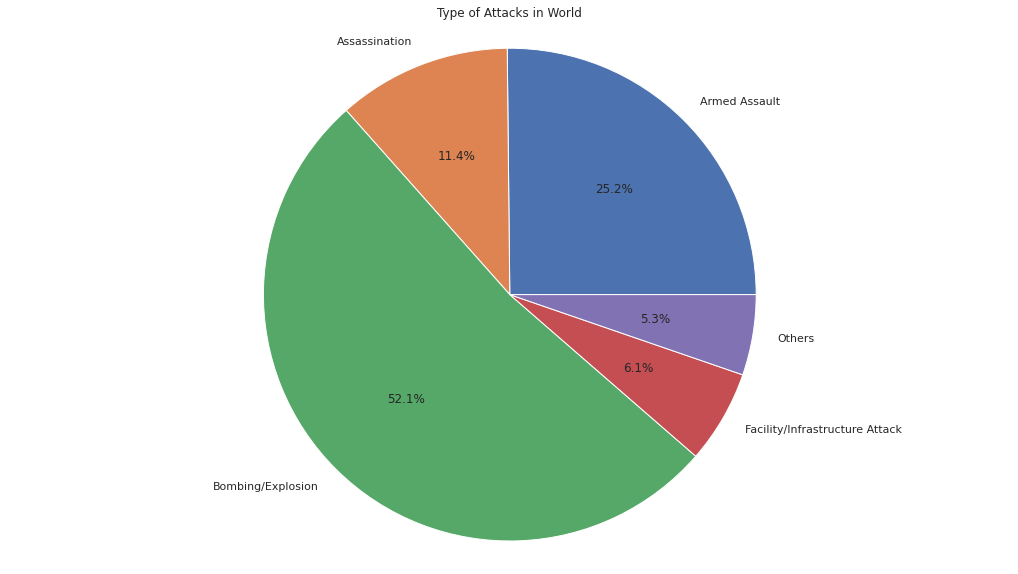

In [47]:
sub_df["attack_type"] =sub_df['attack_type'].apply(lambda x: x if x in ['Assassination', 'Hostage Taking (Kidnapping)','Bombing/Explosion', 'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking','Unarmed Assault', 'Hostage Taking (Barricade Incident)'] else 'Others')
g = sub_df.groupby("attack_type").size().reset_index(name="count")
hostage_count = g.loc[5,"count"] + g.loc[6,"count"]
g.loc[7,"count"] = g.loc[7,"count"] + g.loc[4,"count"] + g.loc[8,"count"]
g = g.drop([4,5,6,8])
g.reset_index(inplace = True)
my_labels = ["Armed Assault",	"Assassination",	"Bombing/Explosion",	"Facility/Infrastructure Attack","Others"]
plt.rcParams['figure.figsize']=(18,10)
plt.pie(g["count"],labels=my_labels,autopct='%1.1f%%')
plt.title('Type of Attacks in World')
plt.axis('equal')
plt.show()


**Conclusion** :- Bombing & Explosions are the most dangerous type of attack used by the Terrorist Groups to do damage in the countries around the World.



**Percentage of people killed by the attacks in world by different attacks.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


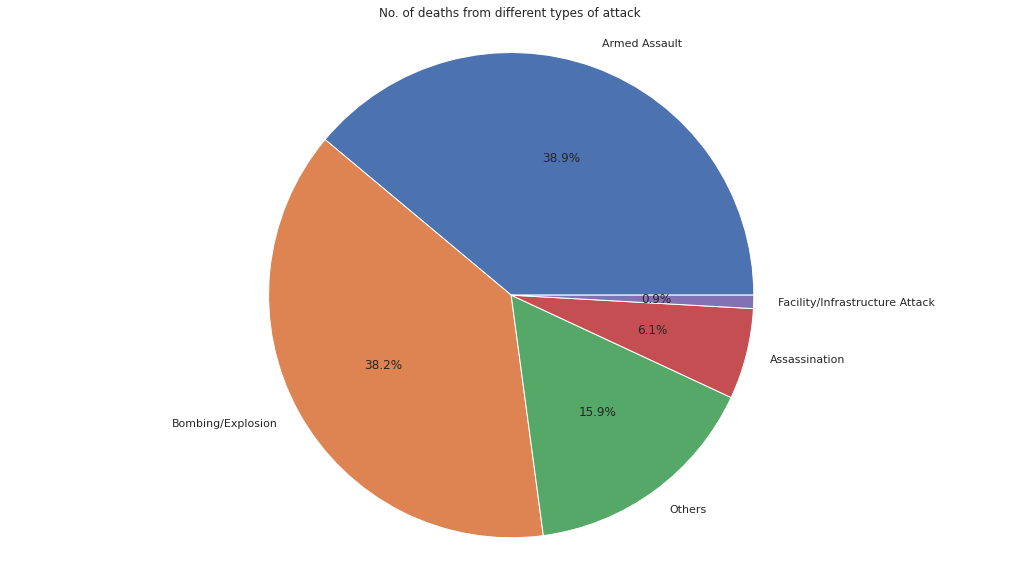

In [45]:
sub_df["Damage"] = sub_df["total_kills"] 
damage_done = sub_df.groupby('attack_type').agg({'Damage':'sum'}).sort_values('Damage',ascending=False)
damage_done.reset_index(inplace = True)
damage_done.loc[2,"Damage"] = damage_done.loc[2,"Damage"] + damage_done.loc[4,"Damage"] + damage_done.loc[5,"Damage"] + damage_done.loc[6,"Damage"] + damage_done.loc[8,"Damage"]
damage_done = damage_done.drop([4,5,6,8])
damage_done.reset_index(inplace = True)
my_labels = ["Armed Assault",	"Bombing/Explosion",	"Others",	"Assassination","Facility/Infrastructure Attack"]
plt.rcParams['figure.figsize']=(18,10)
plt.pie(damage_done["Damage"],labels=my_labels,autopct='%1.1f%%')
plt.title('No. of deaths from different types of attack')
plt.axis('equal')
plt.show()


**Conclusion:**- Armed Assault and Bombing has done the maximum damage in terms of deaths in the World from 1970 to 2017

**Targets selected by the Terrorist Groups in the World to attack**

---



Text(0, 0.5, 'Type of Targets')

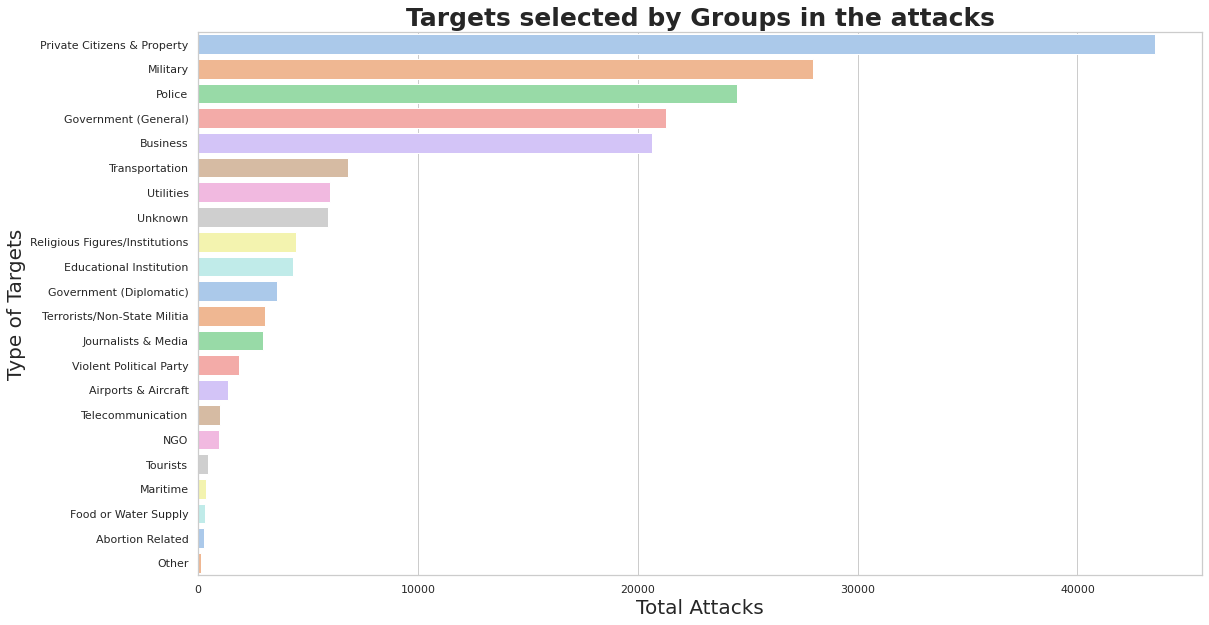

In [ ]:
target_df=sub_df[['target_type','total_kills']].copy()
target_wise=target_df.groupby('target_type').agg({'target_type':'count','total_kills':'sum'}).rename(columns={'target_type':'total_attacks'}).sort_values('total_attacks',ascending=False)
target_wise['total_damage']=target_wise.total_attacks+target_wise.total_kills
target_wise.sort_values('total_damage',ascending=False)
target_wise.reset_index(inplace = True)
plt.rcParams['figure.figsize']=(18,10)
sns.set(font_scale=1)
sns.set_style("whitegrid")
l=sns.barplot(x='total_attacks',y='target_type',data=target_wise,palette='pastel')
l.set_title("Targets selected by Groups in the attacks",fontsize=25,fontweight='bold')
l.set_xlabel('Total Attacks',fontsize=20)
l.set_ylabel('Type of Targets',fontsize=20)

**Conclusion:-** Terrorist Groups are more likely to attack on the Big Private properties like Malls or on Citizens. 